In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import math
import sympy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

# Функции

Построим функцию $$f(x)=\frac{1}{1-x}$$

/home/orange/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  


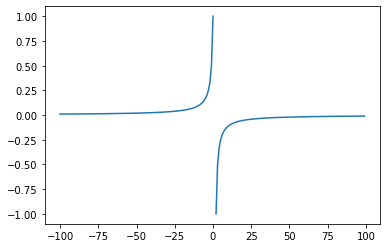

In [3]:
x = np.array([i for i in range(-100, 100)])
y = np.array([1/(1-x_i) for x_i in x])
plt.plot(x, y)
plt.show()

Какова область определения? Какова область значения?

Построим функцию $$f(x)=2^{x}$$

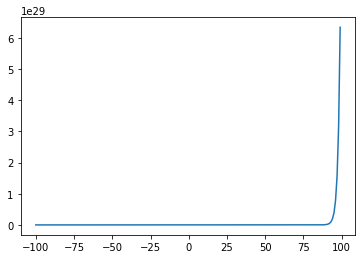

In [8]:
x = np.array([i for i in range(-100, 100)])
y = np.array([math.pow(2, x_i) for x_i in x])
plt.plot(x, y)
plt.show()

# Способы представления функций

**Программный способ представления.**

Дана функция: ![alt text](https://pp.userapi.com/c854520/v854520891/aaadd/f5M6W-fRFjg.jpg). Напишем для неё код.

In [9]:
def func(x):
    stepen = 1/4*math.pow(x, 5) - math.pow(x, 4) + 1/4*math.pow(x, 3) + 3/2*math.pow(x, 2) +1
    y = 1 - pow(2, stepen)
    return y

**Графический способ представления функции.**

Нарисуем график написанной функции:

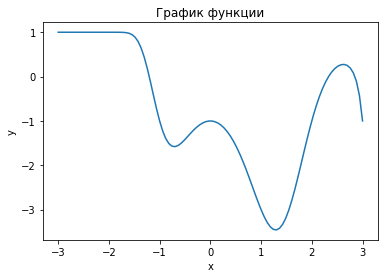

In [10]:
# создаем вектор x
x1 = np.linspace(-3.0, 3.0, 100)
# на основе вектора x строим значения для вектора y
y1 = [func(x1[i]) for i in range(len(x1))]

plt.plot(x1, y1)
plt.title('График функции')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

**Представление функции ввиде формулы.**

Иногда удобно представить функцию ввиде нескольких формул вместо одной. Например, функция y=abs(x). Если мы хотим записать алгоритм функции, легче всего разделить пространство аргументов на плоскости на 2 отрезка: от $-\infty$ до 0 включительно и от 0 до $+\infty $

![alt text](https://pp.userapi.com/c858028/v858028826/2c07f/SOjKZptkdXU.jpg)

# Полиномиальные функции или многочлены.

Целая рациональная функция (также полиномиальная функция) — числовая функция одного действительного переменного вида:
$$f(x) = a_{n}x^{n}+a_{n-1}x^{n-1}+...+a_{2}x^{2}+a_{1}x+a_{0}=\sum_{i=0}^{n}a_{i}x^{i}$$,
где $n\in \mathbb{N}, a_{n},a_{n-1},...,a_{2},a_{1},a_{0}\in \mathbb{R}, a_{n}\neq 0$

**Пример построения полинома: степень = 0.**

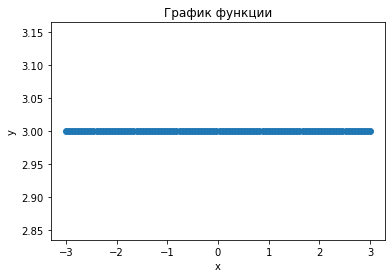

In [11]:
x1 = np.linspace(-3.0, 3.0, 100)
y1 = [3 for _ in range(len(x1))]
plt.plot(x1, y1, '-o')
plt.title('График функции')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

**Пример построения полинома степени 2: подбрасывание мяча**

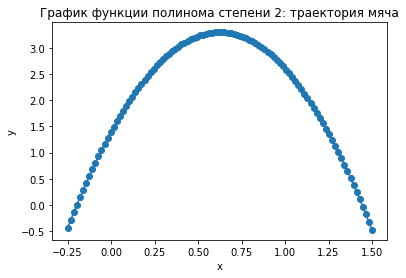

In [12]:
def polynom_2(x):
    y = -4.9*x*x + 6.1*x + 1.4
    return y

x1 = np.linspace(-0.25, 1.5, 100)
y1 = [polynom_2(x1[i]) for i in range(len(x1))]
plt.plot(x1, y1, '-o')
plt.title('График функции полинома степени 2: траектория мяча')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

**Пример построения полинома степени 2: Golden Gate в Сан-Франсиско (слайд 21)**

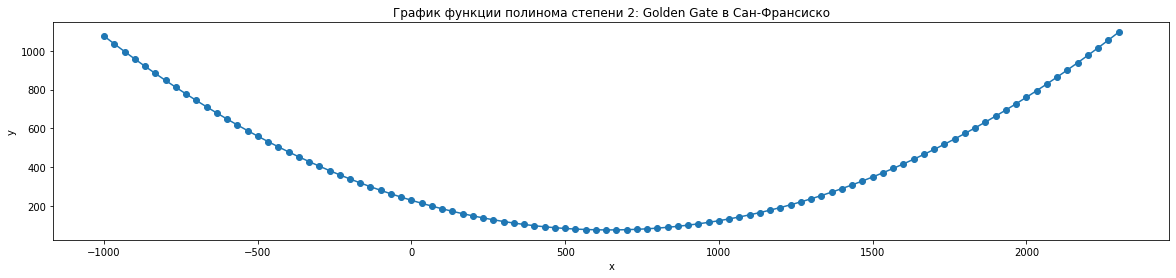

In [16]:
def polynom_golden_gate(x):
    y = 0.00037*x*x - 0.475*x + 230
    return y

x1 = np.linspace(-1000, 2300, 100)
y1 = [polynom_golden_gate(x1[i]) for i in range(len(x1))]
plt.figure(figsize=(20,4))
plt.plot(x1, y1, '-o')
plt.title('График функции полинома степени 2: Golden Gate в Сан-Франсиско')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

# Предел 

/home/orange/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


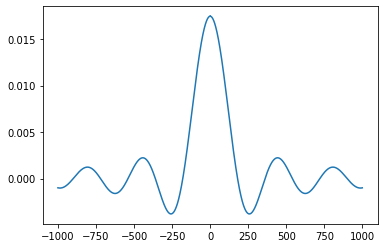

In [24]:
x = np.array([i for i in range(-1000, 1000)])
y = np.array([math.sin(math.radians(x_i))/x_i for x_i in x])
plt.plot(x, y)
plt.show()

Вычислим значение предела функции в точке x = 1

In [37]:
x = sympy.symbols('x') 
expr = sympy.sin(x)/x; 
    
print("Expression : {}".format(expr))  
      
# Use sympy.limit() method  
limit_expr = sympy.limit(expr, x, 0)   
      
print("Limit of the expression tends to 0 : {}".format(limit_expr))   

Expression : sin(x)/x
Limit of the expression tends to 0 : 1


# Примеры пределов

**Пример 1**

Построим график функции $$f(x)=(1+x)^{\frac{1}{x}}$$

/home/orange/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


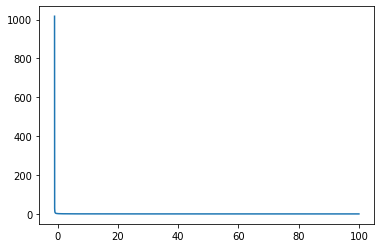

In [88]:
x = np.linspace(-100, 100, 100000)
y = np.array([(1+x_i)**(1/x_i) for x_i in x])

plt.plot(x, y)
plt.show()

In [85]:
print((1+0)**(1/0))

ZeroDivisionError: division by zero

In [89]:
print((1+0.0001)**(1/0.0001))

2.7181459268249255


In [91]:
print((1+0.0000001)**(1/0.0000001))

2.7182816941320818


Предел в точке x = 0 стремится к константе exp = 2.72

In [93]:
print(math.exp(1))

2.718281828459045


**Предел 2**

Построим функцию $$f(x)=1/x$$

Функция неограниченно растет при приближении к x->0

/home/orange/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


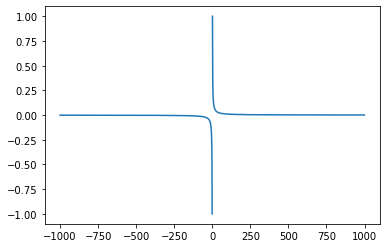

In [76]:
x = np.array([i for i in range(-1000, 1000)])
y = np.array([1/x_i for x_i in x])

plt.plot(x, y)
plt.show()

# Исследование функции с помощью производных

**Сгенерированный пример**

Посмотрим данные, сгенерированные с помощью уравнения синуса

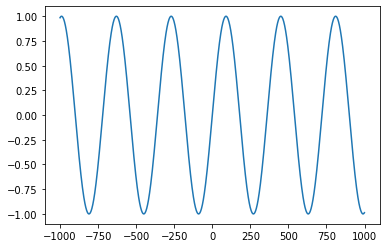

In [255]:
x = np.array([i for i in range(-1000, 1000)])
y = np.array([math.sin(math.radians(x_i)) for x_i in x])
plt.plot(x, y)

Первая производная

In [264]:
list_der_sin = []
for i in range(len(x)-1):
    list_der_sin.append((y[i+1]-y[i])/(x[i+1]-x[i]))
list_der_sin.append(list_der_sin[-1])

Вторая производная

In [265]:
list_second_der_sin = []
for i in range(len(x)-1):
    list_second_der_sin.append((list_der_sin[i+1]-list_der_sin[i])/(x[i+1]-x[i]))
list_second_der_sin.append(list_second_der_sin[-1])

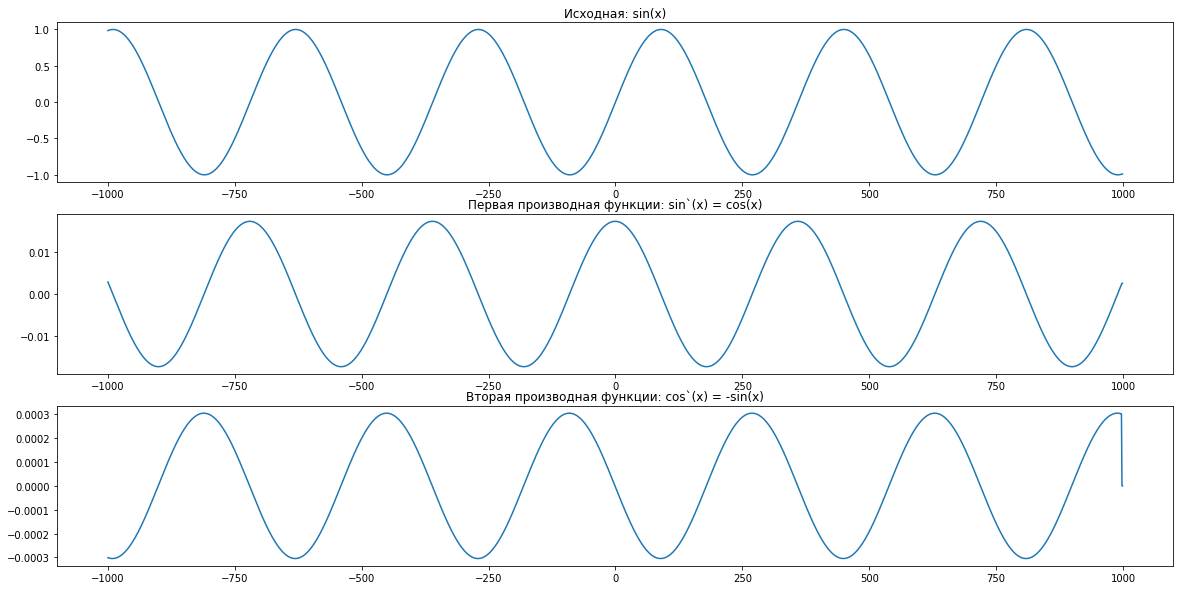

In [266]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная: sin(x)')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: sin`(x) = cos(x)')
axs[1].plot(x, list_der_sin)
axs[2].set_title('Вторая производная функции: cos`(x) = -sin(x)')
axs[2].plot(x, list_second_der_sin)

**Реальный пример**

Рассмотрим график подъема человека по стене. Нам нужно определить, когда человек спустился с верхней точки.

In [218]:
data = pd.read_csv('data/video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


Text(0, 0.5, 'изменение высоты по времени')

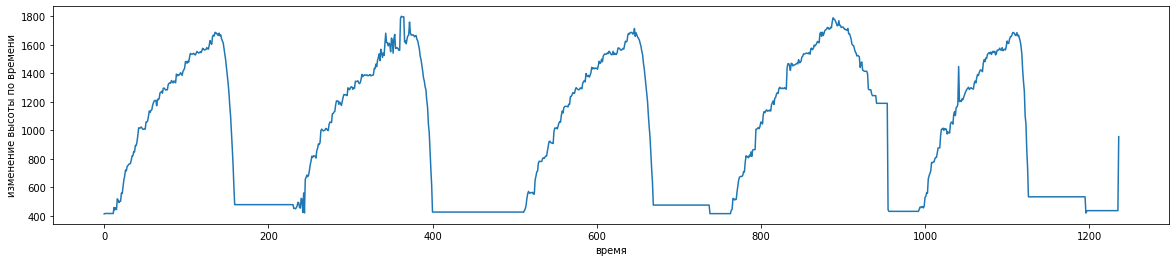

In [219]:
plt.figure(figsize=(20,4))
plt.plot(data.height)
plt.xlabel('время')
plt.ylabel('изменение высоты по времени')

Как найти точку подъема и точку спуска?

Построим график производной

In [267]:
list_ids = data.sec.unique()
list_derivatives = []
for i in range(len(list_ids)-1):
    sec_id_next = list_ids[i+1]
    sec_id = list_ids[i]
    height = list(data.loc[data.sec==sec_id, 'height'])[0]
    next_height = list(data.loc[data.sec==sec_id_next, 'height'])[0]
    list_derivatives.append((next_height - height)/(sec_id_next - sec_id))
list_derivatives.append(list_derivatives[-1])
data['first_derivative'] = list_derivatives

Построим график второй производной

In [268]:
list_ids = data.sec.unique()
second_list_derivatives = []
for i in range(len(list_ids)-1):
    sec_id_next = list_ids[i+1]
    sec_id = list_ids[i]
    derivative = list(data.loc[data.sec==sec_id, 'first_derivative'])[0]
    next_derivative = list(data.loc[data.sec==sec_id_next, 'first_derivative'])[0]
    if (next_height - height) == 0:
        second_list_derivatives.append(-10)    
    else:
        second_list_derivatives.append((next_derivative - derivative)/(sec_id_next - sec_id))
second_list_derivatives.append(second_list_derivatives[-1])
data['second_derivative'] = second_list_derivatives

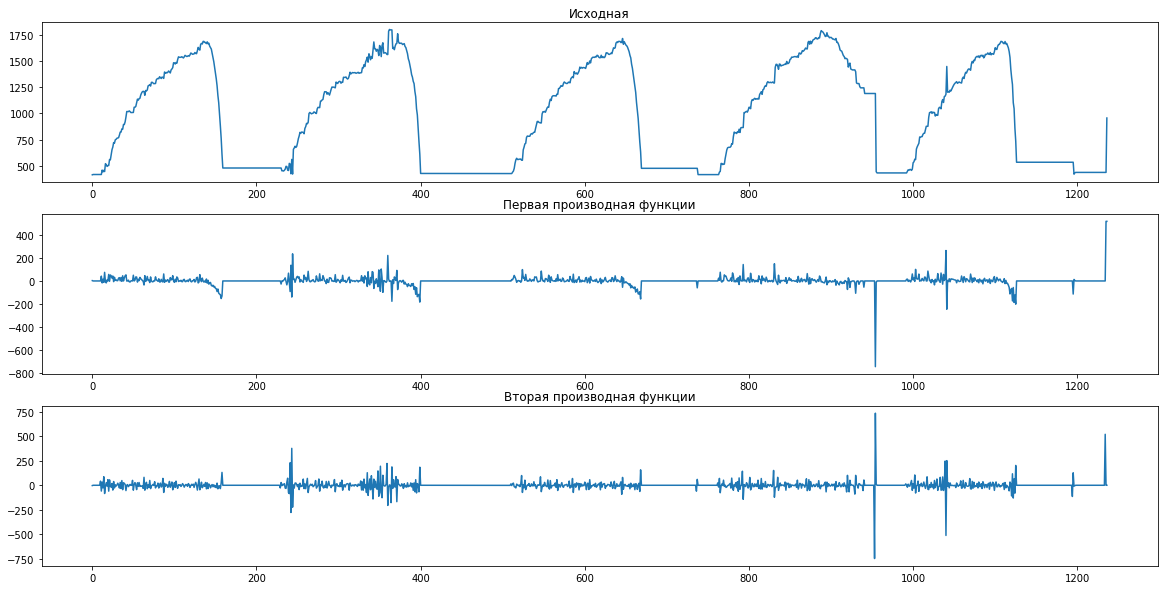

In [270]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная')
axs[0].plot([i for i in range(0, len(data))], data.height)
axs[1].set_title('Первая производная функции')
axs[1].plot([i for i in range(0, len(data['first_derivative']))], data['first_derivative'])
axs[2].set_title('Вторая производная функции')
axs[2].plot([i for i in range(0, len(data['second_derivative']))], data['second_derivative'])

Найдем точку топа (когда человек достиг самой высокой точки) с помощью команды **find_peaks** и атрибутов **prominence** и **width**:

**prominence**: The prominence of a peak measures how much a peak stands out from the surrounding baseline of the signal and is defined as the vertical distance between the peak and its lowest contour line.
    

**width**: Required width of peaks in samples. Either a number, None, an array matching x or a 2-element sequence of the former. The first element is always interpreted as the minimal and the second, if supplied, as the maximal required width.

Команда find_peaks: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

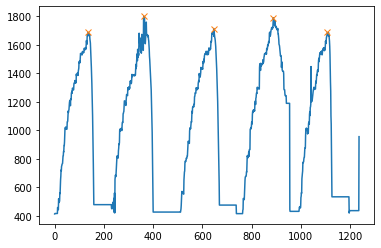

In [278]:
peaks, _ = find_peaks(data.height, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()

### Поиск экстремумов

In [272]:
def f(x):
    return -1 * np.sin(x)/x

In [273]:
def f_(x):
    return -f(x)

### Поиск локальных минимумов

Optimization terminated successfully.
         Current function value: -0.128375
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 19
         Function evaluations: 38


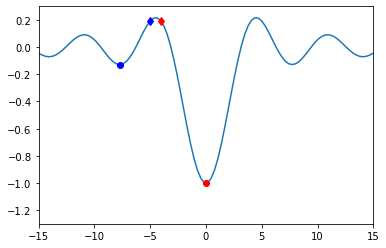

In [274]:
# objective function

x0 = -5 # start from x = -5
xmin0 = fmin(f,x0)

x1 = -4 # start from x = -4
xmin1 = fmin(f,x1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-15,15,-1.3,0.3])
pylab.show()

### Поиск локальных максимумов

Optimization terminated successfully.
         Current function value: -0.217234
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -0.217234
         Iterations: 13
         Function evaluations: 26


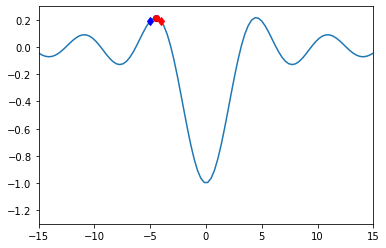

In [7]:
# objective function

x0 = -5 # start from x = -5
xmin0 = fmin(f_,x0)

x1 = -4 # start from x = -4
xmin1 = fmin(f_, x1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-15,15,-1.3,0.3])
pylab.show()

### Производная

In [279]:
from scipy.misc import derivative
def f(x):
    return x**3 + x**2
derivative(f, 1.0, dx=1e-6)

4.999999999921734

derivative(f, 1.0, dx=1e-6):
*   given a function, use a central difference formula with spacing dx to compute the n-th derivative at x0.
*   1.0 - the point at which n-th derivative is found
*   dx - spacing

In [280]:
def f(x):
    return x ** 2 + 1

In [282]:
x = np.linspace(-10, 10)
fx = f(x)
f1x = [derivative(f, xx, dx=1e-6, n=1) for xx in x]

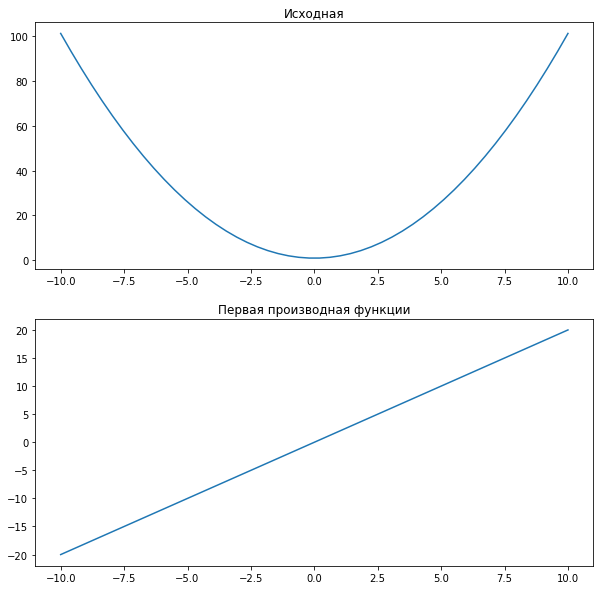

In [285]:
fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].set_title('Исходная')
axs[0].plot(x, fx, label='function')
axs[1].set_title('Первая производная функции')
axs[1].plot(x, f1x, label='derivative')

### Частные производные

In [17]:
def func(x, c0, c1):
    "Coordinate vector `x` should be an array of size two."
    return c0 * x[0]**2 + c1 * x[1]**2

In [18]:
x = np.ones(2)
c0, c1 = (1, 2)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1)

array([2.        , 4.00000003])

### Вычисление частных производных

Хотим посчитать частные производные функции $f(x,y)=x^3y-x^2y^2+x-1$ в точке (1, 1)

$f'_x=3x^2y-2xy^2+1$

$f'_y=x^3-2x^2y$

$f'_x(1,1)=3-2+1=2$

$f'_y(1,1)=1-2=-1$

$grad_f(1,1) = (2, -1)$